In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def randomlife(a,b):
    R = np.random.rand()
    res = (b-a)*R + a
    return res
def f(x): return np.exp(x)

-

I=21722.87 +/- 1360.48
σχετικο σφαλμα δΙ/Ι =  0.06262901646985423
Iexact= 22025.47
θεωριτικο σχετικο σφαλμα δΙ/Ι =  302.5997915233056

Now we have the results from our N-> oo 
We could write: I=22024.28 +/- 1393.33
sxetiko sfalma: 0.06326329487464684
Also δΙΝ= -1.19


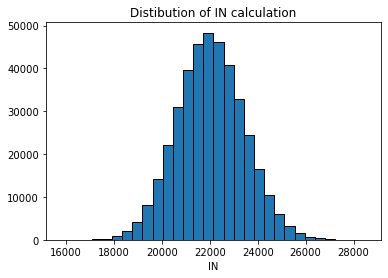

In [4]:
Σf  = 0
Σf2 = 0
n   = 1000
a,b = 0,10

for i in range(n):
    x = randomlife(a,b)
    y = f(x)
    Σf += y
    Σf2 += y*y
    
V   = b - a
μf  = Σf/n
σf2 =(n/(n-1))*((Σf2/n) - μf*μf)
σf  = σf2**0.5

I  = V*μf  # I kapelaki I^
δI = (V*σf)/n**0.5
print( 'I=%3.2lf +/- %3.2lf'%(I,δI))

σχ = δI/I
print("σχετικο σφαλμα δΙ/Ι = ", σχ)


Iexact = f(10) - f(0)
print( 'Iexact= %3.2lf'%(Iexact))

σθεωρ = abs(I-Iexact)/I
print("θεωριτικο σχετικο σφαλμα δΙ/Ι = ", σθεωρ)


'''Now when limI^ N -> oo = I, here we hope to realy get close to Iexact'''
Σf  = 0
Σf2 = 0
N = 4 * 10e4 #this will take some time sit back relax and enjoy
pote=int(N)
n   = 1000
a,b = 0,10
IN=[]
δIN=[]
σχ=[]
for j in range(pote):
    Σf  = 0
    Σf2 = 0
    for i in range(n):
        x = randomlife(a,b)
        y = f(x)
        Σf += y
        Σf2 += y*y
    
    V   = b - a
    μf  = Σf/n
    σf2 = (n/(n-1))*((Σf2/n) - μf*μf)
    s = σf2**0.5
    IN  += [V*μf]
    δIN += [(V*σf)/n**0.5]   #perito?
    σχ += [((V*σf)/n**0.5)/(V*μf)] #ki auto mallon perito
    
I=np.array(IN)
m=I.mean()
var=I.std()
print('\nNow we have the results from our N-> oo ')
print('We could write: ' 'I=%3.2lf +/- %3.2lf'%(m,var))
sx=var/m
print('sxetiko sfalma:',sx)
print('Also δΙΝ= %3.2lf'%(abs(m-Iexact)))
plt.title('Distibution of IN calculation')
plt.hist(I,bins =30 , ec='black')
plt.xlabel('IN')
plt.show()

In [8]:
'''Lets separate the calculation into 2 parts'''
'''Two parts are I1 intergration from 0 to 5 and the second one I2 from 5 to 10'''
'''Each of one will be created from 500 random numbers'''
Σf  = 0
Σf2 = 0
n   = 500
a   = 0
b   = 5    
I  = []
δI  = []
for j in range (2):
    for i in range(n):
        x = randomlife(a,b)
        y = f(x)
        Σf += y
        Σf2 += y*y 
    V = b-a
    μf = Σf/n
    σf2 =(n/(n-1))*((Σf2/n) - μf*μf)
    σf  = σf2**0.5
    I  += [V*μf]  # I kapelaki I^
    δI += [(V*σf)/n**0.5]
    a=b
    b+=5
    
Iολ=[abs(I[0]-I[1])]
Iολ=np.array(Iολ)
δI_total=((δI[0]*δI[0])+(δI[1]*δI[1]))**0.5
print('\nI_total= %3.2lf +- %3.2lf '%(Iολ,δI_total))


I_total= 22917.36 +- 1246.78 
